# Regresion lineal - solucion por grafos

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generar data

In [5]:
NOISE = 10

X = np.linspace(-10,10,100)
Y = [x+(random.random()-0.5)*NOISE for x in X]

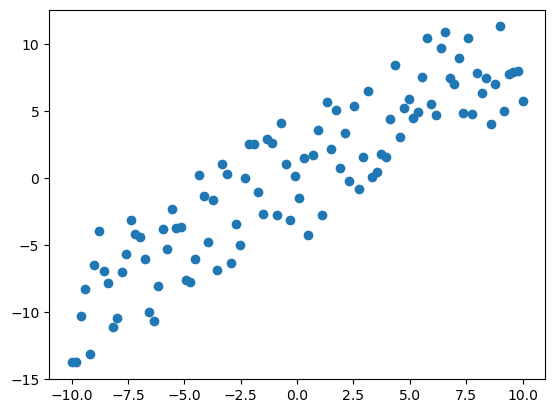

In [7]:
plt.scatter( X, Y )

## Metodos

In [10]:
# modelo : lista de parametros de la funcion, 
#          ejemplo: [2,5] = x*2+4
#          ejemplo: [3,2,5] = 3*(x**2)+2*(x)+4
def calcular_modelo(modelo, x):
    result = 0
    for i in range(len(modelo)):
        result += modelo[-1*(i+1)]*(x**i)
    return result

In [12]:
def calcular_error(modelo,data_x,data_y):
    error_total = 0
    for i in range(len(data_x)):
        predicted_y = calcular_modelo(modelo,data_x[i])
        real_y = data_y[i]
        error_total += (predicted_y-real_y)**2
    return error_total/len(data_x)

## Nodo

In [15]:
class Node:
    def __init__(self,modelo):
        self.modelo = modelo
        self.error = calcular_error(modelo,X,Y)
    def __lt__(self,other):
        return self.error < other.error
    def __str__(self):
        return f"[model:{self.modelo} , error:{self.error:.2f}]"
    def __repr__(self):
        return self.__str__()

## Solucion - y=mx+b

In [18]:
def regresion_linear_grafos(modelo, deltas, max_iteraciones):

    solution_node = Node(modelo)
    
    for iteration in range(max_iteraciones):
    
        next_nodes = []
        
        # generar cambios en los nodos segun los deltas
        for i in range(len(solution_node.modelo)):
            copy_model_pluss = solution_node.modelo[:]
            copy_model_pluss[i] = copy_model_pluss[i] + deltas[i]
            #print(solution_node.modelo," -> ",copy_model_pluss)
            next_nodes.append( Node(copy_model_pluss) )
            copy_model_minus = solution_node.modelo[:]
            copy_model_minus[i] = copy_model_minus[i] - deltas[i]
            #print(solution_node.modelo," -> ",copy_model_minus)
            next_nodes.append( Node(copy_model_minus) )
    
        next_nodes.sort()
    
        if next_nodes[0].error < solution_node.error:
            solution_node = next_nodes[0]
        else:
            print(f"Solution found! in {iteration} iterations")
            break;

    return solution_node

Solution found! in 10 iterations
Solution:  [0.8999999999999999, 0.1]
Error:  7.548810974148597


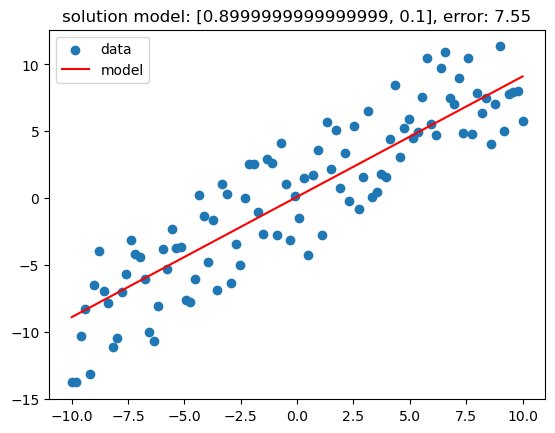

In [20]:
deltas = [0.1,0.1]
modelo = [0,0]

nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

print("======================")
print("Solution: ",nodo_solucion.modelo)
print("Error: ",nodo_solucion.error)

model_predictions = [ calcular_modelo(nodo_solucion.modelo, x) for x in X ]

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( X, Y, label="data" )
plt.plot( X, model_predictions, label="model", color="red" )
plt.legend()
plt.show()

## Solucion - y = a*x**2 + b*x + c

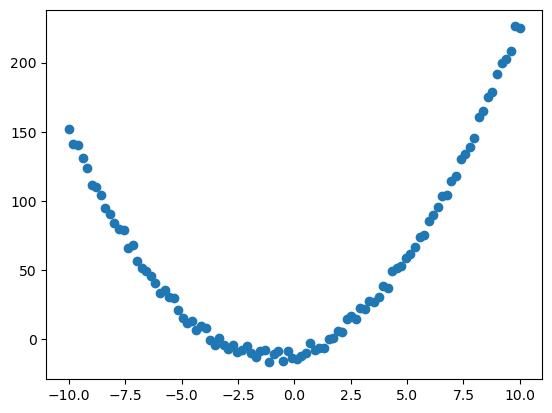

In [23]:
NOISE = 10

A, B, C = 2, 4, -10

X = np.linspace(-10,10,100)
Y = [(A*x**2+B*x+C)+(random.random()-0.5)*NOISE for x in X]

plt.scatter( X, Y )

Solution found! in 128 iterations
Solution:  [1.9000000000000006, 4.000000000000002, -6.8999999999999915]
Error:  18.862574768919128


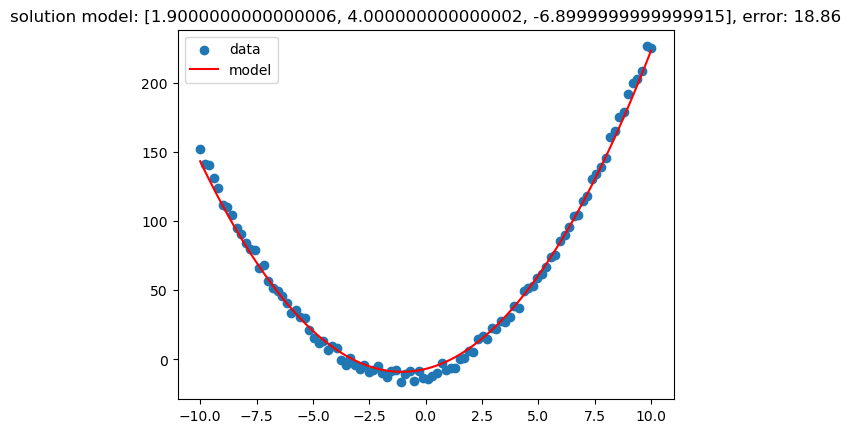

In [25]:
deltas = [0.1,0.1,0.1]
modelo = [0,0,0]

nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

print("======================")
print("Solution: ",nodo_solucion.modelo)
print("Error: ",nodo_solucion.error)

model_predictions = [ calcular_modelo(nodo_solucion.modelo, x) for x in X ]

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( X, Y, label="data" )
plt.plot( X, model_predictions, label="model", color="red" )
plt.legend()
plt.show()